In [1]:
#libaries inladen

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline 
#zorgt dat graphs hier getoond worden
import seaborn as sns
sns.set() # setting seaborn default for plots

import re


In [2]:
train_data = pd.read_csv("./data/train.csv") #data in train_data laden
train_data.head() #data weergeven wat er in zit (testje)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info() #info opvragen wat er in de data zit. we kunnen zien dat er data ontbreekt.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data = pd.read_csv("./data/test.csv")#data in test_data laden
test_data.head() #data weergeven wat er in zit (testje)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.info()#info opvragen wat er in de data zit. we kunnen zien dat er data ontbreekt.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#weergave van de data welke dat overleefde en welke niet. Eerst zicht op welke features belangrijk zijn.
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

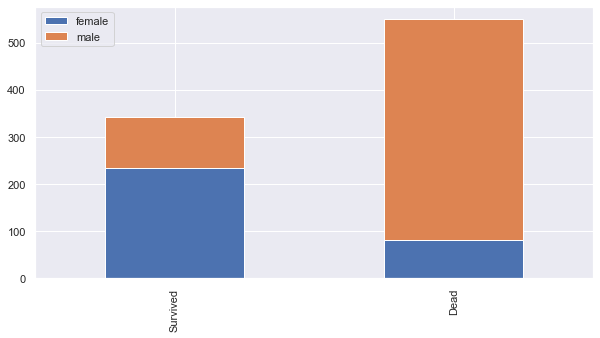

In [9]:
bar_chart('Sex')

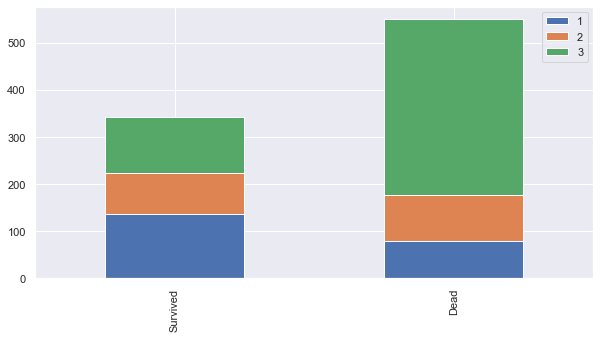

In [10]:
bar_chart('Pclass')

1 = eerste class
2 = tweede class
3 = derde class

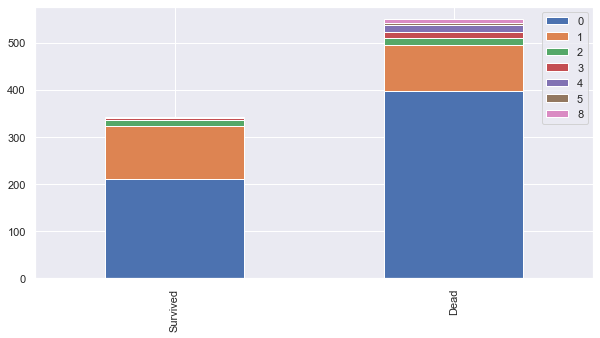

In [11]:
bar_chart('SibSp')

als je alleen bent is de overlevingskans kleiner met meer dan 2 groter

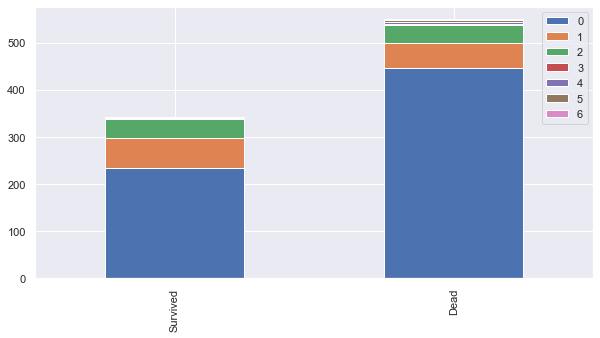

In [12]:
bar_chart('Parch')

mensen met meer dan twee kinderen hadden een groter overlevingskans

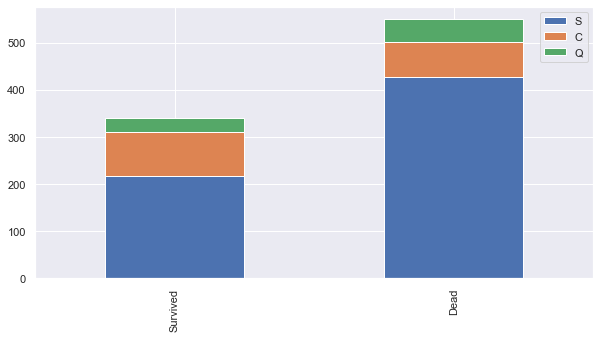

In [13]:
bar_chart('Embarked')

**Alles hiervoor was data inladen en data bekijken/ontdeken**
Nu gaan we de missende data invullen zoals age, fare en embarked + cabin number/ cabin number gaat moeilijk zijn omdat we hier geen echt waarde van kunnen nemen. bijvoorbeeld bij age kunnen we de NaN invullen met random nummers die tussen de means liggen van de tabellen. cabin number heeft wel heel weinig data.

In [14]:
#test en train data worden hier samengezet maar de targets(survived) wordt er uitgehaald zodat er geen data kan geleaked worden
target = train_data.Survived
train_data.drop(['Survived'],1,inplace=True)

#data samenzetten onder train_test_data voor feature engineering + passengerId wordt verwijderd omdat deze geen info geeft
train_test_data = train_data.append(test_data)
train_test_data.reset_index(inplace=True)
train_test_data.drop(['index','PassengerId'],inplace=True,axis=1)

train_test_data.head()



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#naam is onnutige info op zich zelf maar we kunnen wel de titels eruit halen
#train_test_data gecomiboneerde train en test dataset

train_test_data['Title'] = train_test_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_test_data.drop('Name',axis=1,inplace = True)
train_test_data.head()


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
# bij leeftijd zullen we het mediaan nemen van de leeftijd waar de sex Pclass en de title hetzelfde bij zijn.

train_test_data['Age']= train_test_data.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1308 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


In [17]:
#we hebben we gezien in de dia dat s meest gebruikt resultaat dus vullen we her ook in met 'S'
train_test_data.Embarked.fillna('S',inplace=True)
train_test_data.info()
train_test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1308 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
#fare invullen met median fare voor elke Pclass

train_test_data['Fare'].fillna(train_test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
train_test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1308 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


In [19]:
#familieleden parch+sib
#+1 is de passagier zelf
train_test_data['FamilySize'] = train_test_data['Parch'] + train_test_data['SibSp'] + 1
train_test_data.loc[train_test_data['FamilySize'] > 1, 'Alone'] = 'No'
train_test_data.loc[train_test_data['FamilySize'] == 1, 'Alone'] = 'Yes'

    
train_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Alone
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,No
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,No
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Yes
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,No
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Yes


In [20]:
#ticket eruit te veel verschillende variabelen
train_test_data = train_test_data.drop(['Ticket'], axis=1)


In [21]:
# Cabin invullen met median cabin voor elke Pclass 'U' is for unkown

Deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}


train_test_data['Cabin'] = train_test_data['Cabin'].fillna("U0")
train_test_data['Deck'] = train_test_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_test_data['Deck'] = train_test_data['Deck'].map(Deck)
train_test_data['Deck'] = train_test_data['Deck'].fillna("U")
# cabin kan de gedropd worden aangezien we er een deck feature van gemaakt hebben
train_test_data = train_test_data.drop(['Cabin'], axis=1)

train_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Alone,Deck
0,3,male,22.0,1,0,7.2500,S,Mr,2,No,U
1,1,female,38.0,1,0,71.2833,C,Mrs,2,No,C
2,3,female,26.0,0,0,7.9250,S,Miss,1,Yes,U
3,1,female,35.0,1,0,53.1000,S,Mrs,2,No,C
4,3,male,35.0,0,0,8.0500,S,Mr,1,Yes,U


Normalizeren van de data en 'One Hot coding'

In [22]:
#Normalizeren van de data en 'One Hot coding'
#sex
train_test_data['Sex'] = train_test_data['Sex'].map({'male':1, 'female':0})
#embarked
deck_dummies = pd.get_dummies(train_test_data['Deck'], prefix='Deck')    
train_test_data = pd.concat([train_test_data, deck_dummies], axis=1)
train_test_data.drop('Deck', axis=1, inplace=True)
#title
title_dummies = pd.get_dummies(train_test_data['Title'], prefix='Title')    
train_test_data = pd.concat([train_test_data, title_dummies], axis=1)
train_test_data.drop('Title', axis=1, inplace=True)
#embarked
embarked_dummies = pd.get_dummies(train_test_data['Embarked'], prefix='Embarked')    
train_test_data = pd.concat([train_test_data, embarked_dummies], axis=1)
train_test_data.drop('Embarked', axis=1, inplace=True)
#Alone
train_test_data['Alone'] = train_test_data['Alone'].map({'Yes':1, 'No':0})

train_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Alone,Deck_A,Deck_B,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3,0,26.0,0,0,7.9250,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3,1,35.0,0,0,8.0500,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import cross_val_score
# function score gemaakt makkelijker voor herbruik met de verschillende methode
def score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)
#data terug uitelkaar halen
targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
train = train_test_data.iloc[:891]
test = train_test_data.iloc[891:]

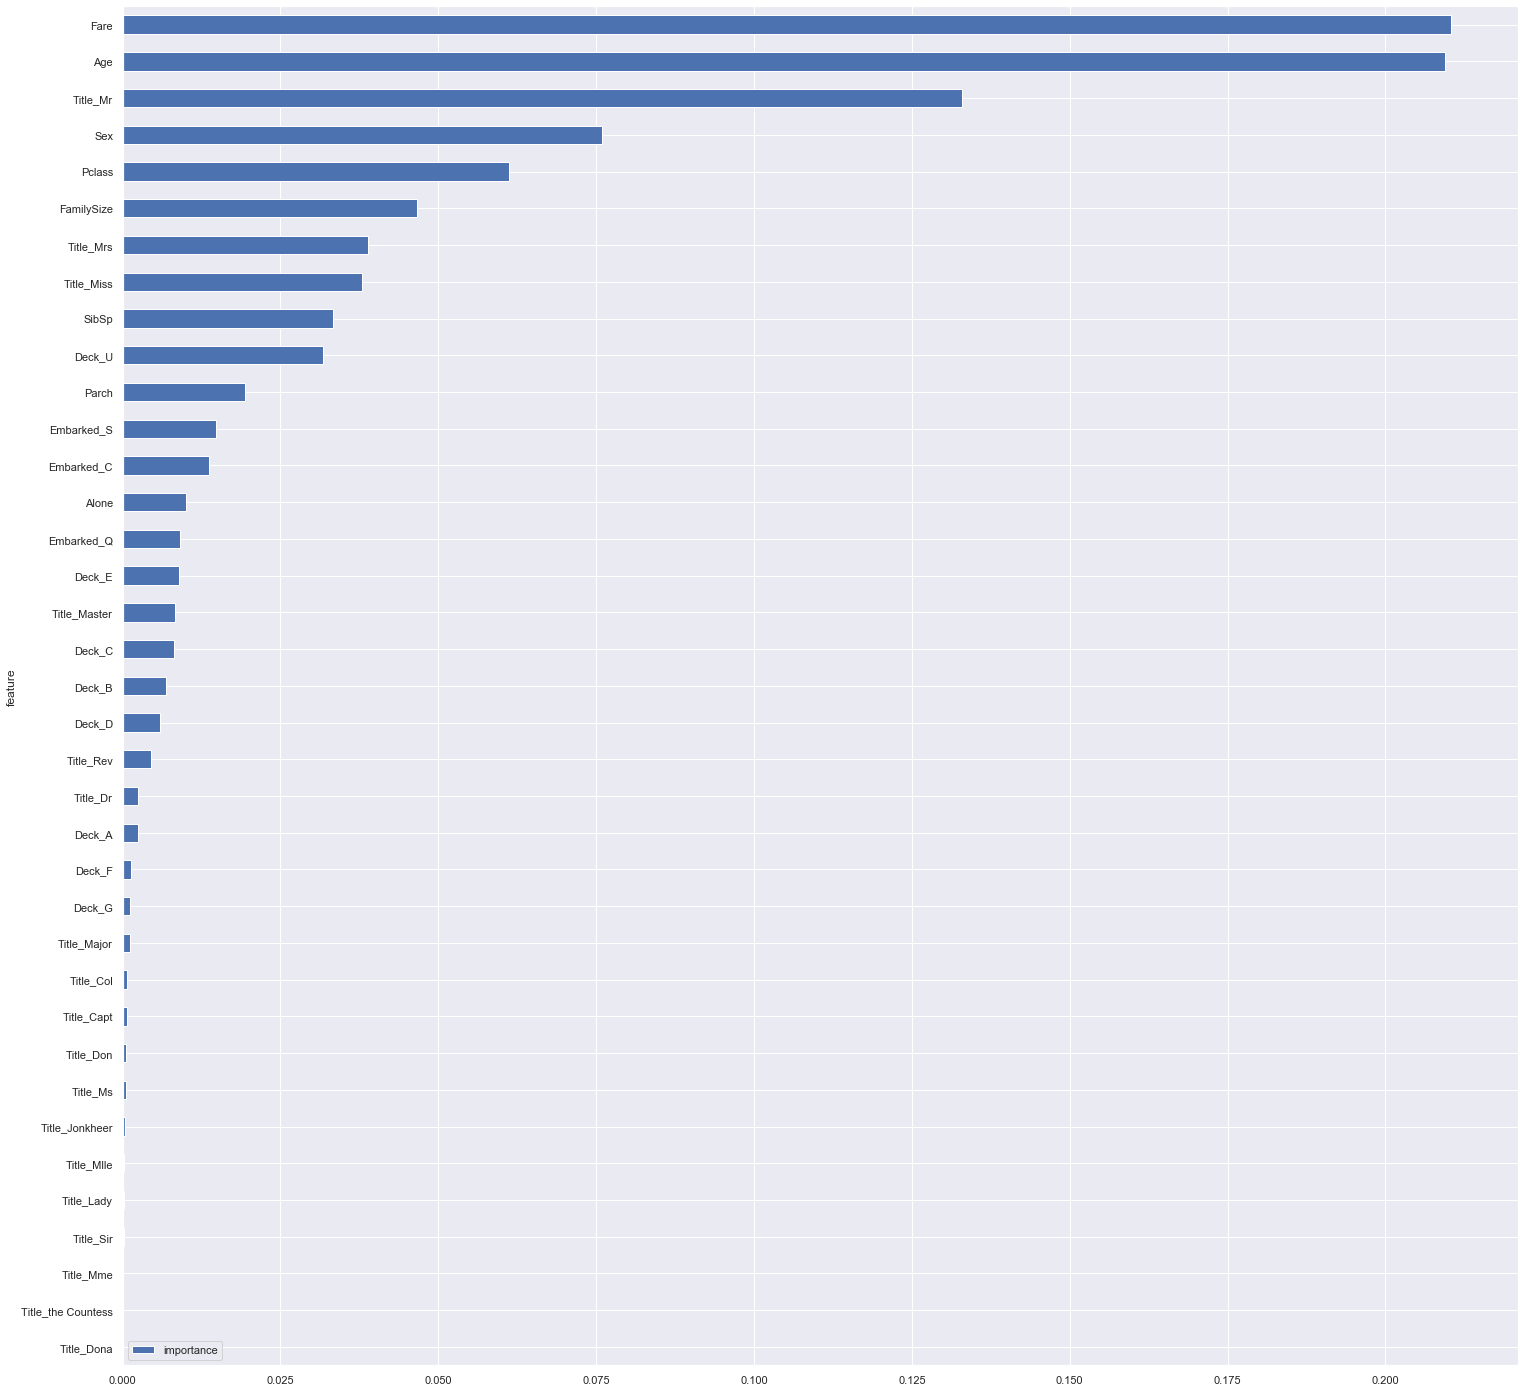

In [28]:
from sklearn.ensemble import RandomForestClassifier
#De features checken welke intresant zijn doormiddel van RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

print("Your submission was successfully saved!")
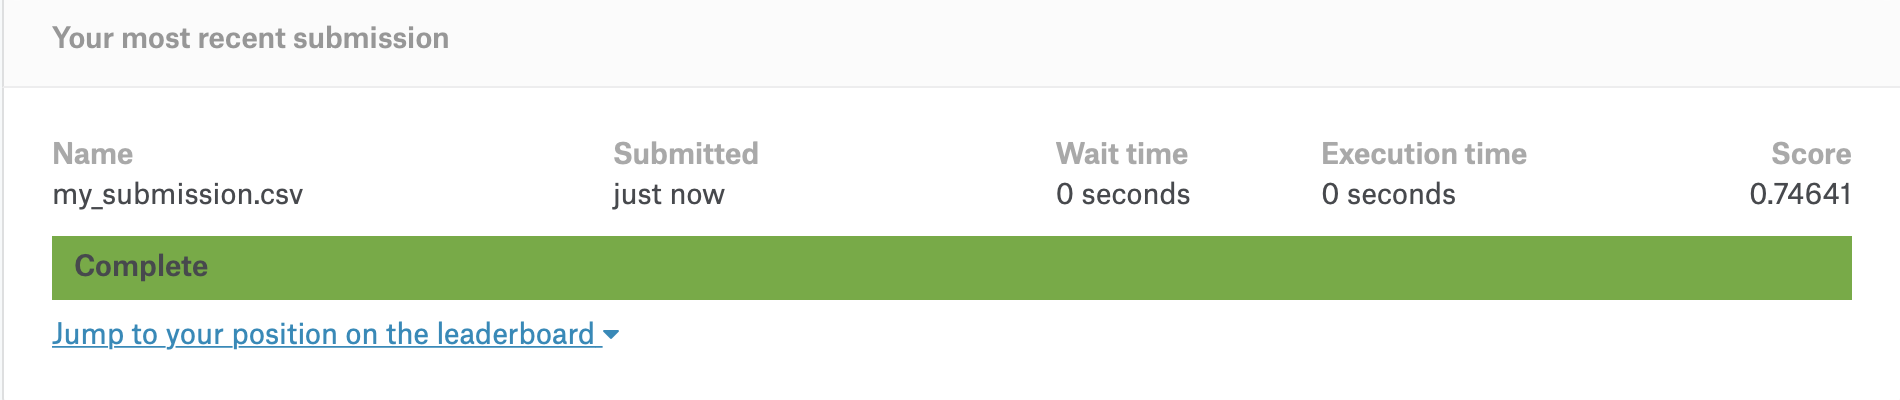


from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submissionDTC.csv', index=False)

print("Your submission was successfully saved!")
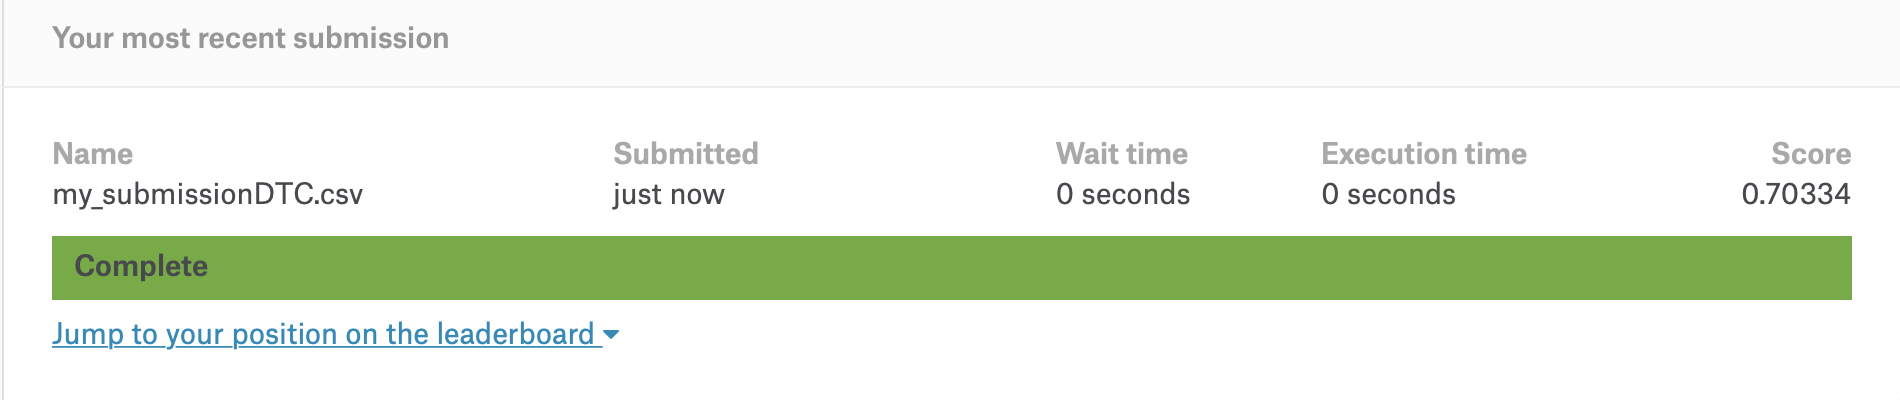

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submissionDTC.csv', index=False)

print("Your submission was successfully saved!")
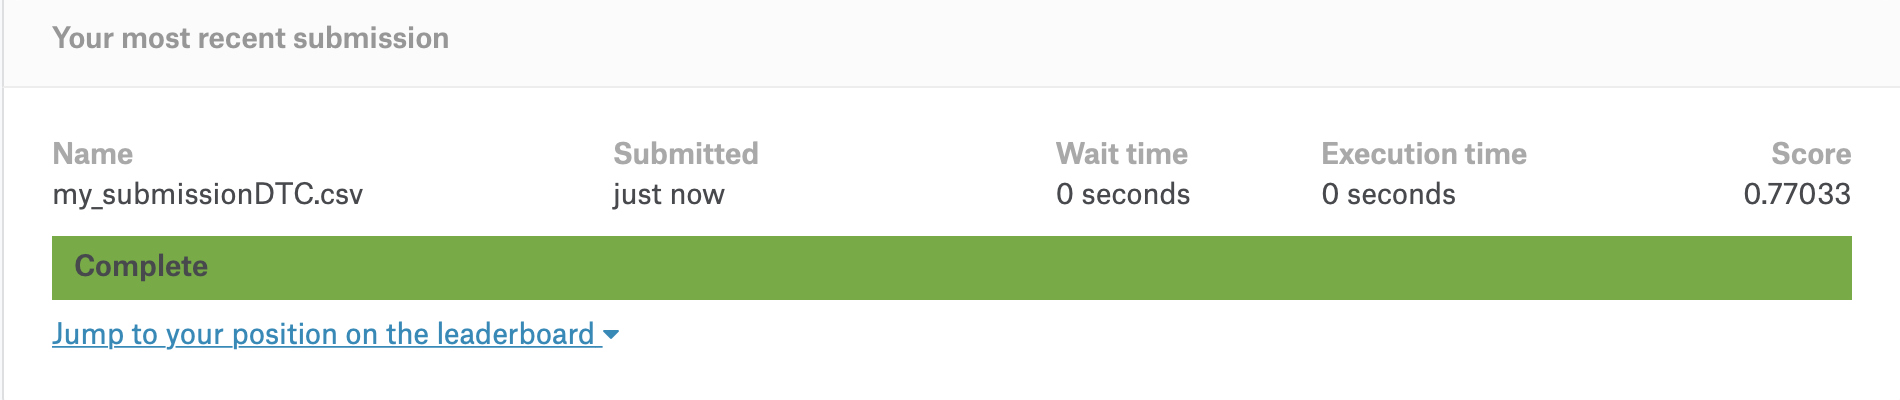

In [30]:
#model LogisticRegression gebruikt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
score = score(clf=model, X=train, y=targets, scoring='accuracy')
print ('Cross-validation of LogisticRegression')
print ('CV score = {0}'.format(score))

Cross-validation of : LogisticRegression
CV score = 0.8227274967931975


/Users/davy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

In [31]:
#model RandomForestClassifier gebruikt
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
score = score(clf=model, X=train, y=targets, scoring='accuracy')
print ('Cross-validation of RandomForestClassifier')
print ('CV score = {0}'.format(score))

Cross-validation of : LogisticRegression
CV score = 0.8013913107621249


In [32]:
#model DecisionTreeClassifier gebruikt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
score = score(clf=model, X=train, y=targets, scoring='accuracy')
print ('Cross-validation of DecisionTreeClassifier')
print ('CV score = {0}'.format(score))

Cross-validation of RandomForestClassifier
CV score = 0.791234444303772


In [33]:
#model KNeighborsClassifier gebruikt
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 10)
score = score(clf=model, X=train, y=targets, scoring='accuracy')
print ('Cross-validation of KNeighborsClassifier')
print ('CV score = {0}'.format(score))

Cross-validation of KNeighborsClassifier
CV score = 0.6959921086238074


In [36]:
#model GradientBoostingClassifier gebruikt
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

model = GradientBoostingClassifier()
score = score(clf=model, X=train, y=targets, scoring='accuracy')
print ('Cross-validation of GradientBoostingClassifier()')
print ('CV score = {0}'.format(score))

Cross-validation of GradientBoostingClassifier()
CV score = 0.8238446024469223


Referenties
https://www.kaggle.com/davyvankeymeulen/titanicproject/edit

https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

https://www.kaggle.com/alexisbcook/titanic-tutorial

https://medium.com/@praveen.orvakanti/this-will-help-you-score-95-percentile-in-the-kaggle-titanic-ml-competition-aa2b3fd1b79b

https://github.com/porvakanti/Kaggle-Competition-TitanicSurvival/blob/master/Kaggle_Titanic_ML_from_Disasters.ipynb

https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge/blob/master/article_1.ipynb